# Class 1 Warm-up on Sims lecture
Words in bold are commands to be typed in the Anaconda prompt.
## Setting up the class environment

1. Install [Anaconda](https://www.anaconda.com/). 
   - To check the conda version: **conda list anaconda$**
2. Create you work environment to be able to reproduce your work
   - to check the environments you have: **conda env list**
   - to create the Class environment: **conda create -n ClassEM python=3.6 notebook numpy pandas matplotlib xlrd statsmodels pandas-datareader**
   - to activate the environment: **conda activate ClassEM**
   - to deactivate the environment: **conda deactivate**
   - to list packages in your environment: **conda list -n ClassEM**
   - to export your packages in a list: **conda list --export > package-list.txt**
   - to create an environment with your packages: **conda create -n myenv --file package-list.txt**   


## Markdown in notebooks
Markdown allows you to enhance your code and make it very readable
> Haavelmo Statistical Testing of Business-Cycle Theories
The modified Haavelmo Model (Sims Nobel Lecture) is:
$$C_t = \beta + {\alpha}Y_t+\epsilon_t$$
$$I_t = \theta_0 + \theta_1(C_t - C_{t-1}) + \eta_t$$
$$Y_t = C_t + I_t + G_t$$
$$G_t = \gamma_0 + \gamma_1G_{t-1} + v_t$$
Substituting for $Y_t$ the system is therefore
\begin{equation}
C_{t}\left(1-\alpha\right)-{\alpha}I_t -{\alpha}G_t = \beta + \epsilon_t
\end{equation}
\begin{equation}
-\theta C_{t}+I_{t}=\theta_0 -\theta C_{t-1}+\eta_{t}
\end{equation}
\begin{equation}
G_t = \gamma_0 + \gamma_1G_{t-1} + v_t
\end{equation}
or in matrix terms
$${\Gamma_0}X_t = C + {\Gamma_1}X_{t-1} + U_t$$
where
$$\Gamma_0=\begin{pmatrix}
1-\alpha&-\alpha&-\alpha\\
-\theta&1&0\\
0&0&1
\end{pmatrix}$$
$$C=\begin{pmatrix}
\beta\\
\theta_0\\
\gamma_0
\end{pmatrix}$$
The reduced form is
$$X_{t}=\Gamma_{0}^{-1}C+\Gamma_{0}^{-1}\Gamma_{1}X_{t-1}+\Gamma_{0}^{-1}U_{t}$$
$$X_{t}=A+BX_{t-1}+V_{t}$$


In [2]:
'''
We always start the code by importing the required package into memory
''' 
import numpy as np                                       #import package for data array manipulation
import pandas as pd                                      #import package for data analysis         
from scipy.optimize import minimize                      #import package for scientific computing
import matplotlib.pyplot as plt                          #import package for plotting
pd.core.common.is_list_like = pd.api.types.is_list_like  # to use DataReader with new version of Pandas
from pandas_datareader.data import DataReader            # DataReader allows to download data from the main online
                                                         # repositories : Eurostat, FRED, OECD, ..

In [3]:
#PANDAS_DATAREADER

start = '1929' #start date                                             
end   = '1943' #end date

cons = DataReader('PCECCA', 'fred', start=start, end=end) #Data from FRED, you need to find the code in the webiste
inv  = DataReader('GPDICA', 'fred', start=start, end=end) #we will see more advanced ways to download data using SDMX
gov  = DataReader('GCECA', 'fred',  start=start, end=end)

In [4]:
# the info method gives you a lot of information 
cons.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15 entries, 1929-01-01 to 1943-01-01
Data columns (total 1 columns):
PCECCA    15 non-null float64
dtypes: float64(1)
memory usage: 240.0 bytes


## Package Pandas: forget EXCEL

In [5]:
# check the first 5 rows with method .head(). 
cons.head()

,PCECCA
DATE,
1929-01-01,830.819
1930-01-01,786.314
1931-01-01,761.754
1932-01-01,693.556
1933-01-01,678.258


In [6]:
# create a panda data frame
haavelmo_data = pd.concat((cons, inv, gov), axis=1)
haavelmo_data.columns = ['c', 'i', 'g']
haavelmo_data['y'] = haavelmo_data['c'] + haavelmo_data['g'] + haavelmo_data['i']

In [7]:
# of course you can read from files, csv are prefererd but almost any format is readable
# you need xlrd module for excel files 
#df = pd.read_excel('C:\\Users\\ffranco\\Dropbox\\Work\\Teaching\\Empirical\\2019\\Class1\\Data\\Sims.xls')
df = pd.read_excel('/Users/franci/Dropbox/Work/Teaching/Empirical/2019/Class1/Data/Sims.xls')
#df = haavelmo_data

FileNotFoundError: [Errno 2] No such file or directory: '/Users/franci/Dropbox/Work/Teaching/Empirical/2019/Class1/Data/Sims.xls'

In [ ]:
# Check the data with the method .info()
df.info()

In [ ]:
# Summary Statistics
df.describe().T

In [ ]:
# check the first 5 rows with method .head(). NOTICE indexing starts with 0 !
df.head()

In [ ]:
# Selecting a column or a row : there are many ways to select a comun let us converge on one
# let us reduce the data set to the first 5 rows
df5 = df.head().copy()

In [ ]:
# select a column with the name
df5['PCECCA']

In [ ]:
# Purely integer-location based indexing for selection by position .iloc 
# nice but you need to know the location
df5.iloc[1:3,0:5]

In [ ]:
# Purely label-location based indexer for selection by label .loc
# can build very complex queries in your table
df5.loc[(df5['date']>='1930-01-01') & (df5['date']<='1932-01-01'),['date','GPDICA','Y']]

### Operators
we have used a logical operator in the above selection
- $|$ :or
- & :and
- $>$ :gt
- $<$ :lt
- $>=$ :ge
- $<=$ :le
- $==$ :eq
- $!=$ :ne

In [ ]:
# print the name of the columns
df.columns

In [ ]:
# rename a column, attention to inplace
df.rename(columns={'Y': 'GDP'},inplace=True)

### Built-in function

In [ ]:
# as a method
df['GDP'].sum()

In [ ]:
# as a function (procedure)
sum(df['GDP'])

In [ ]:
%timeit -n 100 df['GDP'].sum()

In [ ]:
%timeit -n 100 sum(df['GDP'])

## Package Numpy: numerical operations

In [ ]:
# if speed is really an issue, namely BIG dataset, then transforming dataframe into numpy arrays
import numpy as np
GDP = np.array(df['GDP'])
%timeit -n 100 np.sum(GDP)

## Package MATPLOTLIB: plot everything

In [ ]:
#from pandas.plotting import register_matplotlib_converters
# Plot
plt.figure(figsize=(12,6))
plt.plot(haavelmo_data)
plt.xlabel('Date')
plt.ylabel('Billion Chained Dollar')
plt.title('Haavelmo data')
plt.legend(haavelmo_data.columns)
plt.grid()
plt.show()

# Note that you can use haavelmo_data.plot()

In [ ]:
# Plot data
plt.figure(figsize=(16,10))
plt.subplot(221)
plt.plot(haavelmo_data.c)
plt.xlabel('Date')
plt.ylabel('Billion Chained Dollar')
plt.title('Consumption')
plt.grid()
plt.subplot(222)
plt.plot(haavelmo_data.i)
plt.xlabel('Date')
plt.ylabel('Billion Chained Dollar')
plt.title('Investment')
plt.grid()
plt.subplot(223)
plt.plot(haavelmo_data.g)
plt.xlabel('Date')
plt.ylabel('Billion Chained Dollar')
plt.title('Government expenditure')
plt.grid()
plt.subplot(224)
plt.plot(haavelmo_data.y)
plt.xlabel('Date')
plt.ylabel('Billion Chained Dollar')
plt.title('Output')
plt.grid()
plt.show()


## Code for the Model
- Python is an “object-oriented programming language.” This means that almost all the code is implemented using a special construct called classes.
- Programmers use classes to keep related things together. This is done using the keyword “class,” which is a grouping of object-oriented constructs.
- A class is a code template for creating objects. Objects have member variables and have behaviour associated with them. In python a class is created by the keyword class. 
- A class by itself is of no use unless there is some functionality associated with it. Functionalities are defined by setting attributes, which act as containers for data and functions related to those attributes. Those functions are called methods.
- You can also provide the values for the attributes at runtime. This is done by defining the attributes inside the init method.

In [8]:
# We define Haavelmo as class (base)
# The __init__ function is a special method that is run whenever an
# object is created. The self parameter is a reference to the current instance of the class.
class Haavelmo(object):
    
    def __init__(self,k_params,k_variables, params=None):
        
        # Model dimensions (these are attributes)
        self.k_params    = k_params
        self.k_variables = k_variables
        
        # Initialize parameters
        if params is not None:
            self.update(params)
            
    def update(self, params):
        
        # update the parameter values during estimation  
        self.alpha   = params[0]
        self.beta    = params[1]
        self.theta1  = params[2]
        self.theta0  = params[3]
        self.gamma1  = params[4]
        self.gamma0  = params[5]
        self.eps_std = params[6]
        self.eta_std = params[7]
        self.v_std   = params[8]    
        
    def Gamma_0(self):
        Gamma0 = np.array([
                          [1-self.alpha, -self.alpha, -self.alpha],
                          [-self.theta1, 1, 0],
                          [0, 0, 1],
                          ])    
        return Gamma0
    
    def C_(self):
        C      = np.array([
                         [self.beta],
                         [self.theta0],
                         [self.gamma0],
                         ])        
        return C

    def Gamma_1(self):
        Gamma1 = np.array([
                          [0, 0, 0],
                          [-self.theta1, 0, 0],
                          [0, 0, self.gamma1],
                        ])       
        return Gamma1
    
    def VV_(self):
        VV    = np.array([
                         [self.eps_std**2, 0, 0],
                         [0, self.eta_std**2, 0],
                         [0, 0, self.v_std**2],
                         ])
        return VV

The reduced form is
$$X_{t}=\Gamma_{0}^{-1}C+\Gamma_{0}^{-1}\Gamma_{1}X_{t-1}+\Gamma_{0}^{-1}U_{t}$$
$$X_{t}=A+BX_{t-1}+V_{t}$$


- Python is also a procedural language. Let us code the loglikehood defining a function neg_loglike
$\mathcal{L}(\psi)=-\left(Tn/2\right)+\left(T/2\right)log\left|\Gamma_{0}\right|^{2}-\left(T/2\right)log\left|D\right|-0.5\sum_{t=1}^{T}\left[\left(\Gamma_{0}X_{t}-C-\Gamma_{1}X_{t-1}\right)'D^{-1}\left(\Gamma_{0}X_{t}-C-\Gamma_{1}X_{t-1}\right)\right]$

In [9]:
def neg_loglike(theta,endog,exog):    
    params = theta
    mod    = Haavelmo(9,6,params)
    Xhat   = mod.Gamma_0()@endog
    U      = Xhat - mod.C_() - mod.Gamma_1()@exog
    T      = U.shape[1]
    n      = U.shape[0]
    temp   = np.zeros(T-1)
    
    for t in range(0,T-1):
        temp[t] = U[:,t].transpose()@np.linalg.inv(mod.VV_())@U[:,t]
        
    #log likelihhod    
    ll = - T*n/2*np.log(2*np.pi) 
    + T/2*np.log(np.linalg.det(mod.Gamma_0())) 
    - 0.5*temp.sum() 
    - T/2*np.log(np.linalg.det(mod.VV_()))
    
    #penalization if unconstrained minimization                     
    ll = ll - 1000*min(0,1 -params[0]*(1+params[2]))**2 - 1000*min(0,params[2])**2  - 1000*min(0,params[6])**2  - 1000*min(0,params[7])**2  - 1000*min(0,params[8])**2 
    
    return -ll

In [10]:
# Minimization of -LogLikelihood, constrained
# initial guesses

#                       alpha  beta  theta1 theta0 gamma1 gamma0 eps_std eta_std v_std        
theta_start = np.array([ 0.05, 0.5,  0.05,   0.5,  0.991,   0.2,     0.1,   .1,     .1])

# Nelder-Mead, BFGS, 
res = minimize(neg_loglike, theta_start,args=(endog,exog),method="BFGS",options={'disp': True,'maxiter':10000})

NameError: name 'exog' is not defined

## Data preparation

In [11]:
# Prepare the data X and X(-1)
endog = []      
endog.append(np.array(haavelmo_data['c']))
endog.append(np.array(haavelmo_data['i']))
endog.append(np.array(haavelmo_data['g']))
endog = np.array(endog)
endog = endog[:,1:] # drop first observation because of one lag
exog  = []      
exog.append(np.array(haavelmo_data['c'].shift(1)))
exog.append(np.array(haavelmo_data['i'].shift(1)))
exog.append(np.array(haavelmo_data['g'].shift(1)))
exog = np.array(exog)
exog = exog[:,1:]   # drop first observation because of one lag

In [13]:
exog

array([[ 830.819,  786.314,  761.754,  693.556,  678.258,  726.713,
         770.822,  849.239,  880.647,  866.573,  915.044,  962.431,
        1030.456, 1006.008],
       [ 120.381,   81.988,   53.297,   19.658,   26.589,   43.979,
          76.521,   96.754,  119.153,   81.98 ,  103.114,  140.448,
         171.908,   95.731],
       [ 180.39 ,  198.685,  206.848,  200.225,  193.809,  217.789,
         224.553,  259.882,  249.702,  268.682,  292.355,  302.893,
         509.784, 1183.957]])

In [57]:
# Prepare the data DlogX and DlogX(-1)
# We will use the goriwth rate to be cnsistent with stationarity

haavelmo_data['lc'] = np.log(haavelmo_data['c'])
haavelmo_data['li'] = np.log(haavelmo_data['i'])
haavelmo_data['lg'] = np.log(haavelmo_data['g'])

haavelmo_data['dlc'] = haavelmo_data['lc'] - haavelmo_data['lc'].shift(1)
haavelmo_data['dli'] = haavelmo_data['li'] - haavelmo_data['li'].shift(1)
haavelmo_data['dlg'] = haavelmo_data['lg'] - haavelmo_data['lg'].shift(1)

endog = []      
endog.append(np.array(haavelmo_data['dlc']))
endog.append(np.array(haavelmo_data['dli']))
endog.append(np.array(haavelmo_data['dlg']))
endog = np.array(endog)
endog = endog[:,2:] # drop first 2 observations because of one lag

exog  = []      
exog.append(np.array(haavelmo_data['dlc'].shift(1)))
exog.append(np.array(haavelmo_data['dli'].shift(1)))
exog.append(np.array(haavelmo_data['dlg'].shift(1)))
exog  = np.array(exog)
exog  = exog[:,2:]   # drop first 2 observations because of one lag

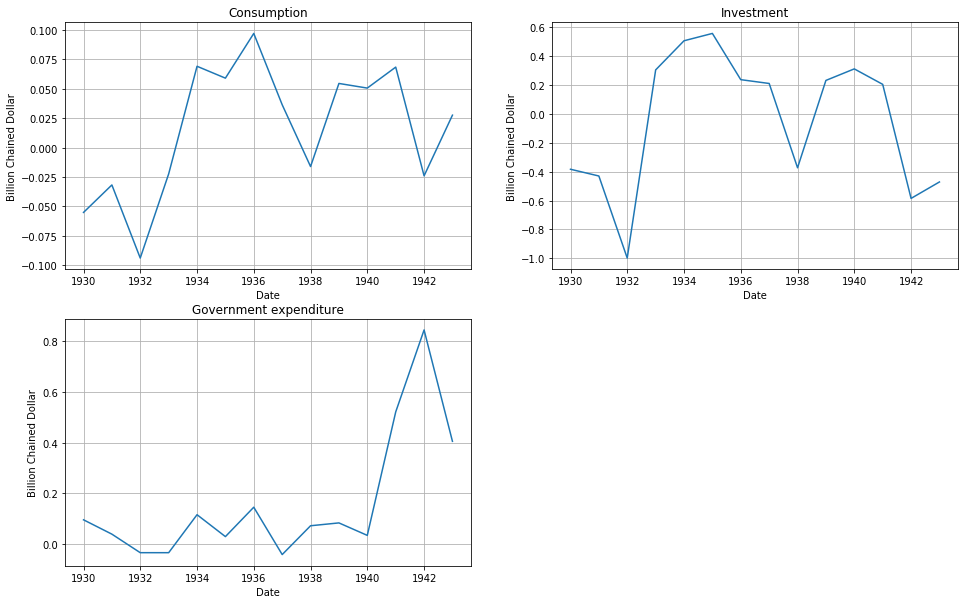

In [58]:
# Plot data
plt.figure(figsize=(16,10))
plt.subplot(221)
plt.plot(haavelmo_data.dlc)
plt.xlabel('Date')
plt.ylabel('Billion Chained Dollar')
plt.title('Consumption')
plt.grid()
plt.subplot(222)
plt.plot(haavelmo_data.dli)
plt.xlabel('Date')
plt.ylabel('Billion Chained Dollar')
plt.title('Investment')
plt.grid()
plt.subplot(223)
plt.plot(haavelmo_data.dlg)
plt.xlabel('Date')
plt.ylabel('Billion Chained Dollar')
plt.title('Government expenditure')
plt.grid()
plt.show()

## Minimization using Scipy package routines

In [60]:
# Minimization of -LogLikelihood, constrained
# initial guesses

#                       alpha  beta  theta1 theta0 gamma1 gamma0 eps_std eta_std v_std        
theta_start = np.array([ 0.05, 0.5,  0.05,   0.5,  0.991,   0.2,     0.1,   .1,     .1])

# Nelder-Mead, BFGS, 
res = minimize(neg_loglike, theta_start,args=(endog,exog),method="BFGS",options={'disp': True,'maxiter':10000})

Optimization terminated successfully.
         Current function value: -26.080491
         Iterations: 64
         Function evaluations: 869
         Gradient evaluations: 79


In [96]:
# parameter solution
sol = pd.DataFrame(res.x,index=['alpha','beta', 'theta1','theta0','gamma1','gamma0','eps_std','eta_std','v_std'],columns=['parameters'])
sol['SE']=np.sqrt(np.diagonal(res.hess_inv))
sol['T-stat']=sol['parameters']/sol['SE']
sol

,parameters,SE,T-stat
alpha,0.084689,0.014680,5.768848
beta,0.005103,0.007528,0.677889
theta1,2.311678,1.993676,1.159505
theta0,0.006934,0.110492,0.062753
gamma1,1.266780,0.340303,3.722502
gamma0,0.039074,0.056888,0.686851
eps_std,0.024986,0.005130,4.870833
eta_std,0.380005,0.092580,4.104595
v_std,0.170234,0.033486,5.083806


# Bayesian analysis

A nice and common way to highlight the differences between frequentis and bayesian nalysis is to compare the confidence interval of frequentists with the corresponding notion in Bayesian statistics, credible interval.
- Confidence interval is from the frequentist's approach, where the parameter is fixed. The confidence interval is based on the repetition of the observations. A 98% confidence interval means that repeating the experiment to measure the parameter a large number of times and calculating the interval for each experiment, 98% of the intervals will contain the value of the parameter. This goes back to the fact that the data is random.
- Credible (or probability) interval stems from probabilities, that is, the Bayesian approach. This means that the parameter is random and we can say that, given the data, there is a 98% chance that the true value of the parameter is in the interval.

Markov chain Monte Carlo (MCMC) methods
In Bayesian statistics the parameters are not constant but random variables with a distribution. We are now looking for
$$\pi(\psi|X_T)\propto f_{X_T}(X_T|\psi)\pi(\psi)$$
where the first term on the RHS is the likelihood and the second the prior distribution of the parameters.The LHS is the posterior distribution and is the quantity of interest. MCMC methods allow to sample from ths posterior distribution.
One of the most simple algorithm to implement a MCMC is the Metropolis-Hastings algorithm. The idea is to construct a Markov chain for $\psi$
1. Given the current value of $\psi_{s-1}$, propose a new value $\psi^*$ selected from a proposal $q(\psi;\psi_{s-1})$
2. With probability $\alpha(\psi_{s-1},\psi^*)$ the proposed value is accepted if not the chain remains in place
now $$\alpha(\psi_{s-1},\psi^*) = min\Big({\frac{\pi(\psi^*|X_T)q(\psi^*;\psi_{s-1})}{\pi(\psi_{s-1}|X_T)q(\psi_{s-1};\psi^*)}},1\Big)$$
 $$                             = min\Big({\frac{f_{X_T}(X_T|\psi^*)\pi(\psi^*)q(\psi^*;\psi_{s-1})}{f_{X_T}(X_T|\psi_{s-1})\pi(\psi_{s-1})q(\psi_{s-1};\psi_{s-1}^*)}},1\Big)$$
 and using a proposal distribution that satistifes $q(\psi_{s-1};\psi_{s-1}^*)=q(\psi^*;\psi_{s-1})$. Which we can compute from the Likelihood and the prior.
A convienent choice is $$\psi^*=\psi_{s-1} +\epsilon_s, \epsilon_s \sim{N(0,\Sigma_\epsilon)}$$

In [97]:
from scipy.stats import multivariate_normal,norm, invgamma, uniform 
# Specify priors

prior_alpha   = uniform(loc =0, scale=3)  
prior_beta    = uniform(loc =0, scale=3)        
prior_theta   = uniform(loc =0, scale=3)         
prior_theta0  = uniform(loc =0, scale=3)         
prior_gamma1  = uniform(loc =0, scale=2)         
prior_gamma0  = uniform(loc =0, scale=2) 
prior_eps_std = invgamma(5)
prior_eta_std = invgamma(5)
prior_v_std   = invgamma(5)
# Specify the random walk proposal
rw_proposal   = multivariate_normal(cov=res.hess_inv*0.4) # an important aspect: the initial covariance matrix is
                                                          # the inverse of the Hessian of likelihod and the parameter
                                                          # is set as to obtain a 25% acceptance rate


In [98]:
# Create storage arrays for the traces
n_iterations = 25000
trace = np.zeros((n_iterations + 1, 9))
trace_accepts = np.zeros(n_iterations)
trace[0] = [0.05, 0.5, 1, 0.5, 0.991, 0,0.1,.1,.1] # Initial values
# Iterations
for s in range(1, n_iterations + 1):
    proposed = trace[s-1] + rw_proposal.rvs()
    acceptance_probability = np.exp(-neg_loglike(proposed,endog,exog) + neg_loglike(trace[s-1],endog,exog) +
    prior_alpha.logpdf(proposed[0]) +
    prior_beta.logpdf(proposed[1]) + prior_theta.logpdf(proposed[2]) +
    prior_theta0.logpdf(proposed[3])+ prior_gamma1.logpdf(proposed[4]) +
    prior_gamma0.logpdf(proposed[5])+ prior_eps_std.logpdf(proposed[6]) + 
    prior_eps_std.logpdf(proposed[7]) + prior_eps_std.logpdf(proposed[8]) -
    prior_alpha.logpdf(trace[s-1, 0]) -
    prior_beta.logpdf(trace[s-1, 1]) - prior_theta.logpdf(trace[s-1, 2]) -
    prior_theta0.logpdf(trace[s-1, 3])- prior_gamma1.logpdf(trace[s-1, 4]) -
    prior_gamma0.logpdf(trace[s-1, 5])- prior_eps_std.logpdf(trace[s-1, 6]) - 
    prior_eps_std.logpdf(trace[s-1, 7]) - prior_eps_std.logpdf(trace[s-1, 8]))
    pp = uniform.rvs()                                
    if acceptance_probability > pp:
        trace[s] = proposed
        trace_accepts[s-1] = 1
    else:
        trace[s] = trace[s-1]

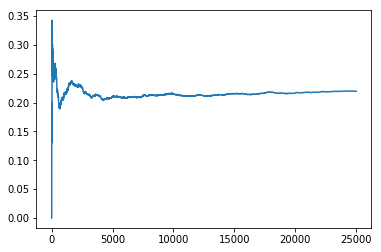

In [99]:
# Plot the acceptance rate
plt.plot(np.cumsum(trace_accepts)/np.arange(1, len(trace_accepts)+1))

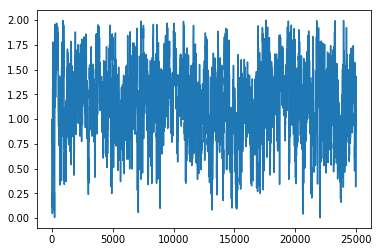

In [102]:
# plot the value sample gamma1 from the posterior
plt.plot(trace[:,4])

(array([ 171.,  462., 1075., 2298., 4101., 4840., 5177., 3797., 2117.,
         963.]),
 array([1.30197925e-03, 2.00954561e-01, 4.00607142e-01, 6.00259724e-01,
        7.99912305e-01, 9.99564886e-01, 1.19921747e+00, 1.39887005e+00,
        1.59852263e+00, 1.79817521e+00, 1.99782779e+00]),
 <a list of 10 Patch objects>)

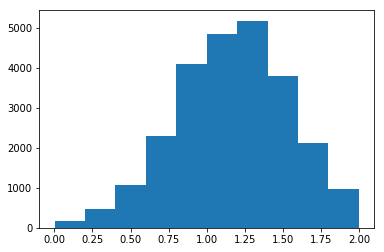

In [103]:
# Plot the histogram of gamma1
plt.hist(trace[:,4])

In [105]:
!conda install --yes -n ClassEM seaborn

Solving environment: done

## Package Plan ##

  environment location: /Users/franci/anaconda3/envs/ClassEM

  added / updated specs:
    - seaborn


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    seaborn-0.9.0              |           py36_0         379 KB
    ------------------------------------------------------------
                                           Total:         379 KB

The following NEW packages will be INSTALLED:

  seaborn            pkgs/main/osx-64::seaborn-0.9.0-py36_0



seaborn-0.9.0        | 379 KB    | ##################################### | 100% 
Preparing transaction: done
Verifying transaction: done
Executing transaction: done


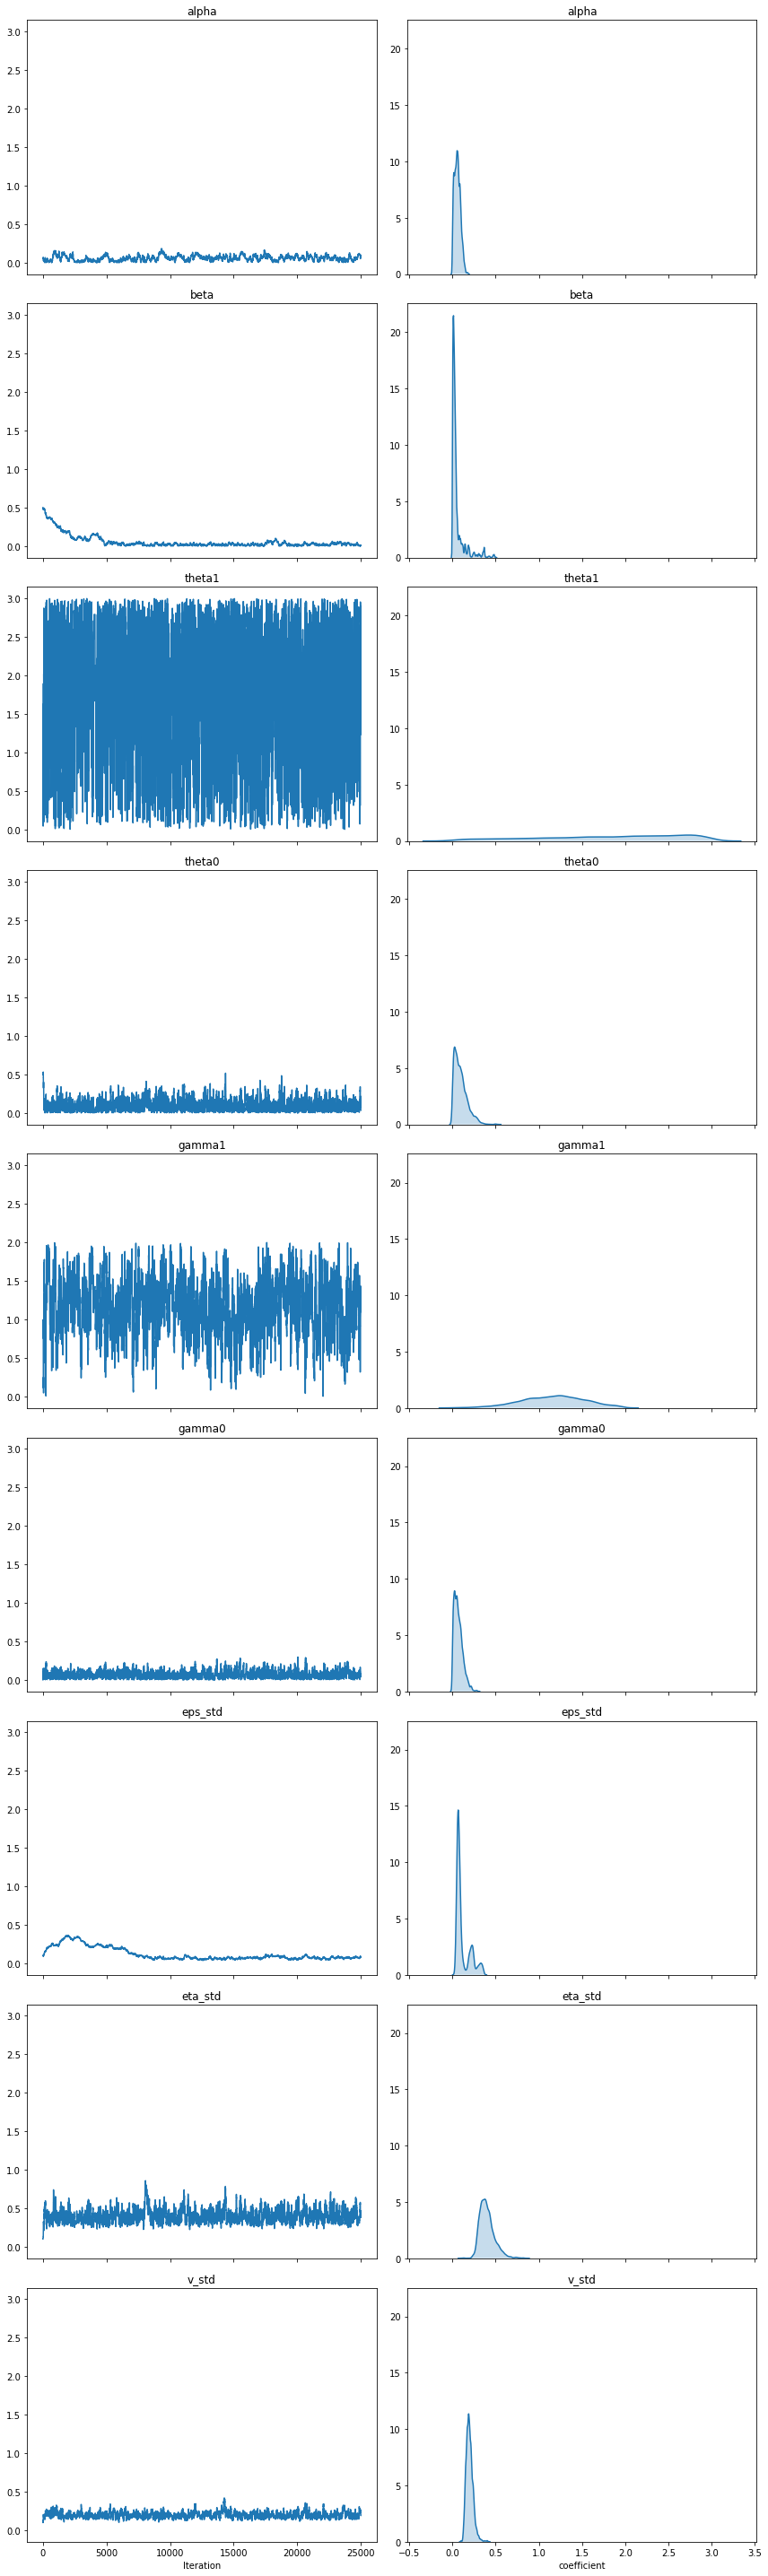

In [114]:
import seaborn as sns
index=['alpha','beta', 'theta1','theta0','gamma1','gamma0','eps_std','eta_std','v_std']
fig, axes = plt.subplots(9, 2, sharex='col', sharey='col')
fig.set_size_inches(12, 40)
for i in range(9):
  axes[i][0].plot(trace[:,i])
  axes[i][0].title.set_text(str(index[i]))
  sns.kdeplot(trace[:,i], ax=axes[i][1], shade=True)
  axes[i][1].title.set_text(str(index[i]))
axes[9 - 1][0].set_xlabel("Iteration")
axes[9 - 1][1].set_xlabel("coefficient")
fig.tight_layout()
plt.show()